In [59]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
df=pd.read_csv("D:\Data science\Python\Datasets\Mall_Customers.csv")

In [61]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
df=pd.get_dummies(df,drop_first=True)

In [63]:
df.head()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [64]:
df.isnull().sum()

CustomerID            0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
Genre_Male            0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   CustomerID          200 non-null    int64
 1   Age                 200 non-null    int64
 2   Annual_Income_(k$)  200 non-null    int64
 3   Spending_Score      200 non-null    int64
 4   Genre_Male          200 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB


In [66]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


In [67]:
df.corr()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,0.060867
Annual_Income_(k$),0.977548,-0.012398,1.000000,0.009903,0.056410
Spending_Score,0.013835,-0.327227,0.009903,1.000000,-0.058109
Genre_Male,0.057400,0.060867,0.056410,-0.058109,1.000000


In [68]:
df=df.drop(['CustomerID'],axis=1)

In [69]:
df.head()

,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [70]:
df.shape

(200, 4)

<AxesSubplot:>

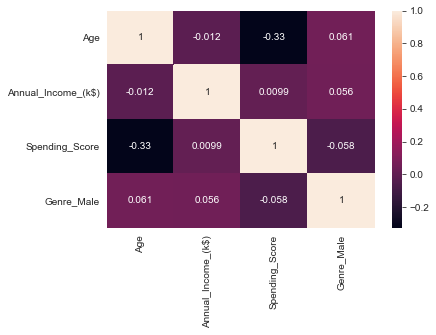

In [71]:
sns.heatmap(df.corr(),annot=True)

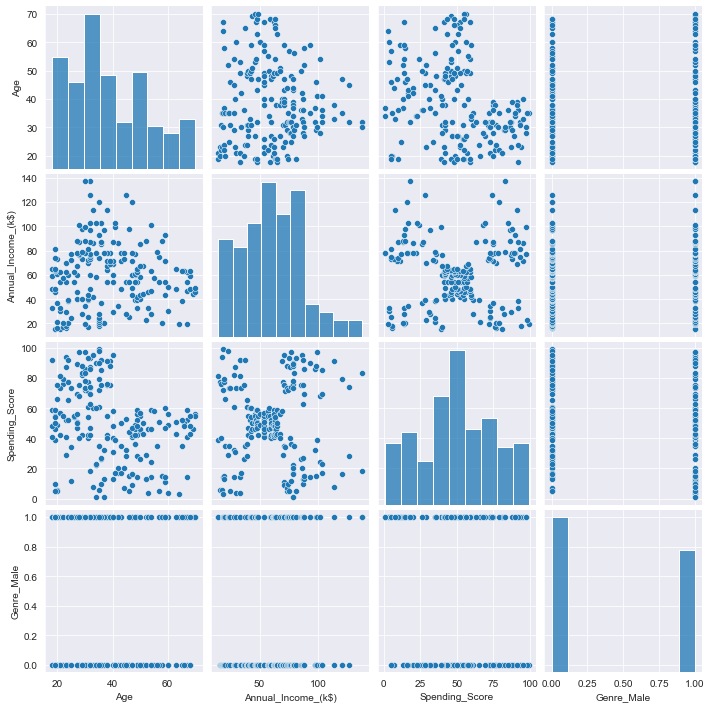

In [72]:
sns.pairplot(df)

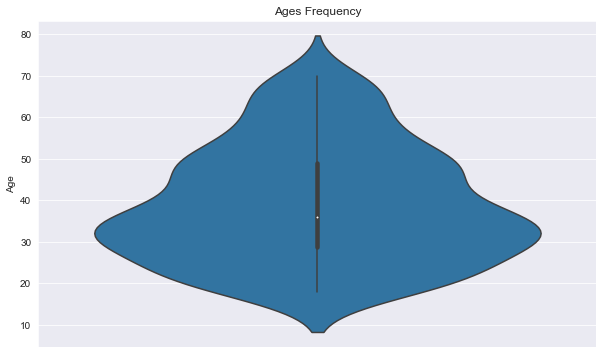

In [73]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

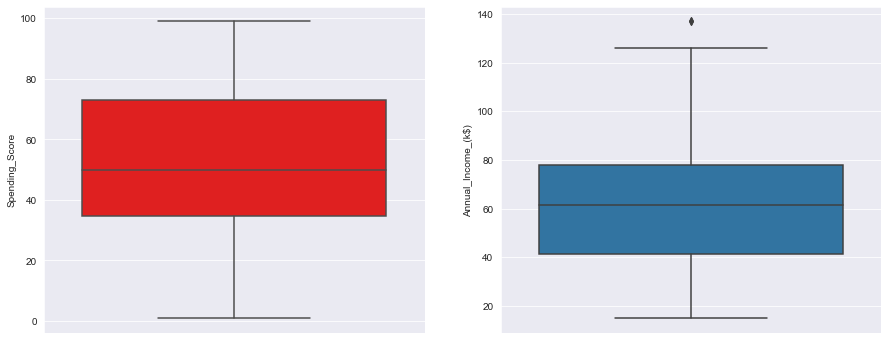

In [74]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending_Score"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual_Income_(k$)"])
plt.show()

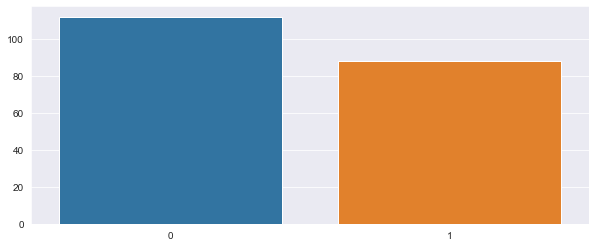

In [75]:
genders = df.Genre_Male.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

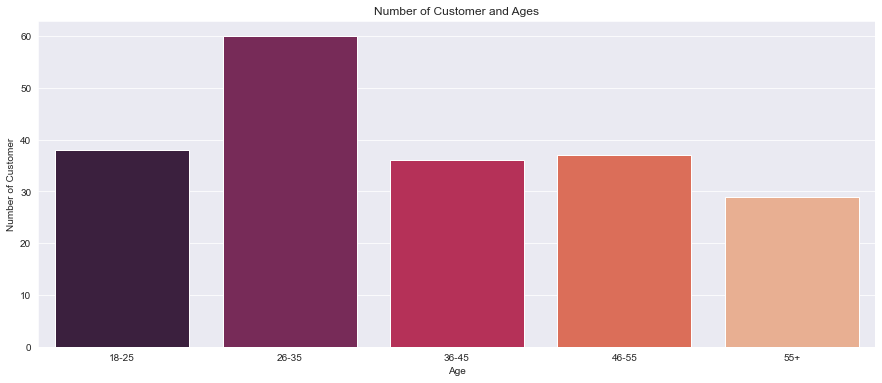

In [76]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [100]:
X=df.iloc[:,0:]

In [101]:
X.head()

,Age,Annual_Income_(k$),Spending_Score,Genre_Male,label
0,19,15,39,1,3
1,21,15,81,1,2
2,20,16,6,0,3
3,23,16,77,0,2
4,31,17,40,0,3


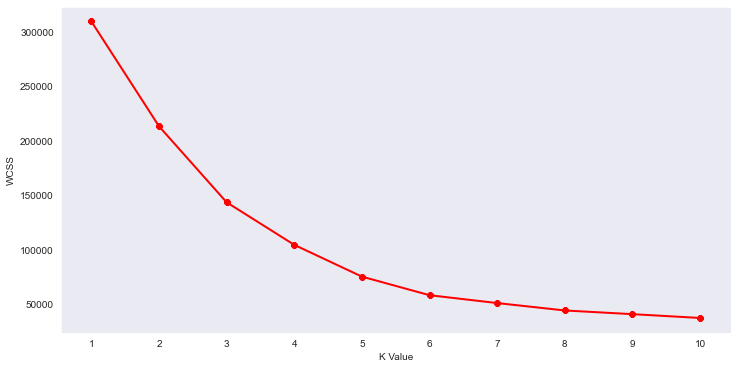

In [102]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

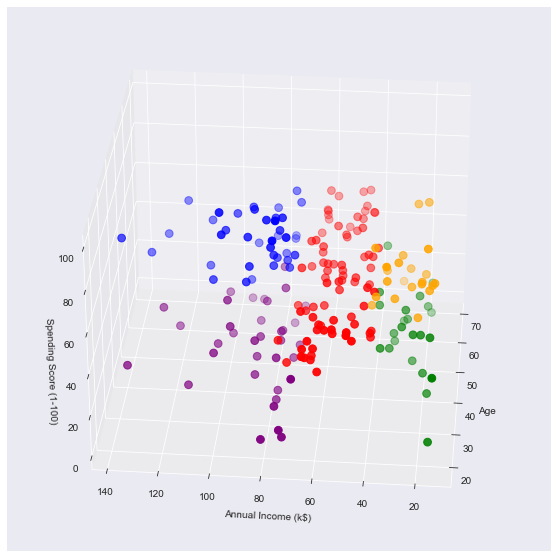

In [104]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual_Income_(k$)"][df.label == 0], df["Spending_Score"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual_Income_(k$)"][df.label == 1], df["Spending_Score"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual_Income_(k$)"][df.label == 2], df["Spending_Score"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual_Income_(k$)"][df.label == 3], df["Spending_Score"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual_Income_(k$)"][df.label == 4], df["Spending_Score"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()
